In [1]:
import sys
import os

# 获取当前文件所在的目录
current_dir = os.path.dirname(os.path.abspath(''))
# 将当前目录添加到 sys.path 中
sys.path.append(current_dir)

from face_package.face_location import Location
from face_package.face_matting import Matting
from face_package.face_emotion import Emotion

In [2]:
from face_package import DATA_DIR

location = Location()
image_path = f"{DATA_DIR}/person/01巴昊.png"

2024-12-29 16:57:44.582 | INFO     | face_package.face_location:__init__:16 - model path is fd:\mse\code\face\face_package/../model/yolov11n-face.pt
2024-12-29 16:57:44.704 | INFO     | face_package.face_location:__init__:21 - Loaded model, cuda is available


In [3]:
from PIL import Image

person_image:Image.Image = Image.open(image_path)

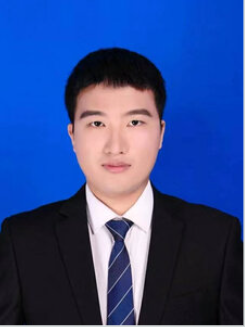

In [4]:
person_image

In [5]:
xywh = location.detect(person_image)[0]


0: 640x480 1 face, 45.0ms
Speed: 2.0ms preprocess, 45.0ms inference, 56.9ms postprocess per image at shape (1, 3, 640, 480)


2024-12-29 16:57:51.477 | INFO     | face_package.face_location:detect:34 - [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face'}
obb: None
orig_img: array([[[227,  84,   5],
        [228,  84,   5],
        [228,  84,   5],
        ...,
        [198,  67,   0],
        [216, 156, 124],
        [217, 217, 211]],

       [[227,  84,   5],
        [228,  84,   5],
        [228,  84,   5],
        ...,
        [198,  67,   0],
        [216, 156, 124],
        [217, 217, 211]],

       [[227,  83,   5],
        [227,  84,   5],
        [228,  84,   5],
        ...,
        [198,  67,   0],
        [216, 156, 124],
        [217, 217, 211]],

       ...,

       [[ 27,  20,  23],
        [ 26,  19,  22],
        [ 26,  19,  22],
        ...,
        [ 19,  12,  15],
        [134, 131, 131],
        [217, 217, 211]],

       [[175, 173, 171],
        [174, 173, 170],
        [174, 172, 170],
 

In [6]:
xywh.shape

(4,)

In [7]:
xywh


array([     117.23,      138.34,      85.015,      110.17], dtype=float32)

In [8]:
from face_package import crop_image_from_xywh, get_expanded_sub_image
face_image = crop_image_from_xywh(person_image, xywh)

In [9]:
face_expand_image = get_expanded_sub_image(person_image, xywh, 1.5)

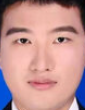

In [10]:
face_image

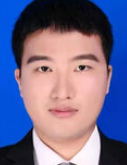

In [11]:
face_expand_image

In [12]:
# 此处可以调用你写的类查看matting效果

matting_model = Matting()

In [14]:
# 此处可以调用你写的类查看情绪识别

emotion_model = Emotion()